In [1]:
import pandas as pd
import os
import random

In [2]:
idle_directory = "../data/combined data files/idle/"
attack_directory = "../data/combined data files/spectre/"

idle_files = [file for file in os.listdir(idle_directory)]
attack_files = [file for file in os.listdir(attack_directory)]

file = idle_directory + idle_files[1]
file

'../data/combined data files/idle/Idle_20241118_113051.csv'

In [3]:
df = pd.read_csv(file)
df.columns.tolist()

['index',
 'Offcore All Data Reads LLC Any Response',
 'Offcore All Data Reads LLC Miss to DRAM',
 'Offcore Demand Data Reads LLC Miss to DRAM',
 'Offcore Demand Data Reads LLC Hit Any Response',
 'Branch Instructions',
 'Branch Misses',
 'Cache References',
 'Cache Misses',
 'L1 Data Cache Loads',
 'L1 Data Cache Load Misses',
 'Executed Branch Instructions',
 'Executed Conditional Branches',
 'Executed Branch Mispredictions',
 'Executed Conditional Branch Mispredictions',
 'Retired Branch Mispredictions',
 'Retired Near-Taken Branch Mispredictions',
 'L2 All Demand Data Reads',
 'L2 Demand Data Read Hits',
 'Retired Branch Instructions',
 'Retired Conditional Branches']

In [4]:
branch_misses = "Branch Misses"
branch_instructions = "Branch Instructions"
branch_miss_rate = "Branch Miss Rate"

cache_misses = "Cache Misses"
cache_references = "Cache References"
cache_miss_rate = "Cache Miss Rate"

executed_branch_mispredictions = "Executed Branch Mispredictions"
executed_branch_instructions = "Executed Branch Instructions"
executed_branch_misprediction_rate = "Executed Branch Misprediction Rate"

retired_branch_mispredictions = "Retired Branch Mispredictions"
retired_branch_instructions = "Retired Branch Instructions"
retired_branch_misprediction_rate = "Retired Branch Misprediction Rate"

executed_conditional_branch_mispredictions = "Executed Conditional Branch Mispredictions"
executed_conditional_branches = "Executed Conditional Branches"
executed_conditional_misprediction_rate = "Executed Conditional Misprediction Rate"

retired_near_taken_mispredictions = "Retired Near-Taken Branch Mispredictions"
retired_conditional_branches = "Retired Conditional Branches"
retired_near_taken_misprediction_rate = "Retired Near-Taken to Conditional misprediction Rate"

# Variables provided by you for L1, L2, and L3 cache metrics
L1_data_load_misses = "L1 Data Cache Load Misses"
L1_data_load_all = "L1 Data Cache Loads"
L1_data_load_miss_rate = "L1 Data Cache Load Miss Rate"

L2_demand_data_read_hits = "L2 Demand Data Read Hits"
L2_demand_data_read_all = "L2 All Demand Data Reads"
L2_demand_data_read_hit_rate = "L2 Demand Data Read Hit Ratio"

L3_demand_data_read_misses = "Offcore Demand Data Reads LLC Miss to DRAM"
L3_demand_data_read_hits = "Offcore Demand Data Reads LLC Hit Any Response"
L3_demand_data_read_miss_rate = "Offcore Demand Data Reads LLC Miss Rate"

L3_all_data_read_all = "Offcore All Data Reads LLC Any Response"
L3_all_data_read_misses = "Offcore All Data Reads LLC Miss to DRAM"
L3_all_data_read_miss_rate = "Offcore All Data Reads LLC miss rate"

# additional rates
retired_to_executed_branch_rate = "Retired To Executed Branch Rate"
retired_to_executed_branch_misprediction_rate = "Retired to Executed Branch Misprediction Rate"

rate_pairs = [
    (L1_data_load_misses, L1_data_load_all, L1_data_load_miss_rate),
    (L2_demand_data_read_hits, L2_demand_data_read_all, L2_demand_data_read_hit_rate),
    (L3_all_data_read_misses, L3_all_data_read_all, L3_all_data_read_miss_rate),
    (executed_branch_mispredictions, executed_branch_instructions, executed_branch_misprediction_rate),
    (retired_branch_mispredictions, retired_branch_instructions, retired_branch_misprediction_rate),
    (executed_conditional_branch_mispredictions, executed_conditional_branches, executed_conditional_misprediction_rate),
    (retired_near_taken_mispredictions, retired_conditional_branches, retired_near_taken_misprediction_rate),
    (retired_branch_instructions, executed_branch_instructions, retired_to_executed_branch_rate),
    (retired_branch_mispredictions,executed_branch_mispredictions,retired_to_executed_branch_misprediction_rate),
    (branch_misses, branch_instructions, branch_miss_rate),
    (cache_misses, cache_references, cache_miss_rate),
]

def get_rate(df):
    """
    Compute logical rates from the given DataFrame based on predefined rate pairs.
    Returns a DataFrame with computed rates capped at 1 and infinities replaced with NaN.
    """
    rates_data = {}
    for numerator, denominator, rate_name in rate_pairs:
        rate = df[numerator] / df[denominator]
        rate.replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle infinities
        rate.fillna(0, inplace=True)
        rate = rate.clip(upper=1)  # Cap the rate at 1
        rates_data[rate_name] = rate
    
    rate = df[L3_demand_data_read_misses] / df[L3_demand_data_read_misses]+df[L3_demand_data_read_hits]
    rate = df[numerator] / df[denominator]
    rate.replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle infinities
    rate.fillna(0, inplace=True)
    rate = rate.clip(upper=1)  # Cap the rate at 1
    rates_data[L3_demand_data_read_miss_rate] = rate
    
    return pd.DataFrame(rates_data)


In [5]:
# Directories
idle_directory = "../data/combined data files/idle/"
attack_directory = "../data/combined data files/spectre/"

# Function to load all CSV files except the first one
def load_csv_files(directory):
    files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    return {f"df_{index}": pd.read_csv(os.path.join(directory, file)) for index, file in enumerate(files[1:], start=1)}

# Load dataframes for idle and attack directories
idle_dataframes = load_csv_files(idle_directory)
attack_dataframes = load_csv_files(attack_directory)

# Display available dataframes
print("Idle DataFrames:")
for name, df in idle_dataframes.items():
    print(f"{name}: {df.shape}")

print("\nAttack DataFrames:")
for name, df in attack_dataframes.items():
    print(f"{name}: {df.shape}")


Idle DataFrames:
df_1: (7673, 21)
df_2: (7003, 21)
df_3: (7003, 21)
df_4: (7003, 21)
df_5: (7004, 21)
df_6: (8003, 21)
df_7: (8003, 21)
df_8: (8003, 21)
df_9: (8004, 21)
df_10: (8003, 21)
df_11: (8003, 21)
df_12: (8003, 21)
df_13: (8003, 21)
df_14: (8003, 21)
df_15: (8002, 21)
df_16: (8003, 21)
df_17: (8003, 21)
df_18: (8003, 21)
df_19: (8003, 21)
df_20: (8003, 21)
df_21: (8003, 21)
df_22: (8003, 21)
df_23: (8003, 21)
df_24: (8003, 21)
df_25: (8003, 21)
df_26: (8003, 21)
df_27: (8003, 21)
df_28: (8003, 21)
df_29: (8003, 21)
df_30: (8003, 21)

Attack DataFrames:
df_1: (7660, 21)
df_2: (9786, 21)
df_3: (10484, 21)
df_4: (7994, 21)
df_5: (9777, 21)
df_6: (7237, 21)
df_7: (8730, 21)
df_8: (7366, 21)
df_9: (9642, 21)
df_10: (7053, 21)
df_11: (9042, 21)
df_12: (9701, 21)
df_13: (6278, 21)
df_14: (8869, 21)
df_15: (10517, 21)
df_16: (7753, 21)
df_17: (6313, 21)
df_18: (6547, 21)
df_19: (8035, 21)
df_20: (7664, 21)
df_21: (10183, 21)
df_22: (8041, 21)
df_23: (7361, 21)
df_24: (7822, 21)
df_25:

In [25]:
# Process idle DataFrames
rate_idle_dataframes = {
    name: get_rate(df).iloc[:6000] for name, df in idle_dataframes.items()
}

# Process attack DataFrames
rate_attack_dataframes = {
    name: get_rate(df).iloc[:6000] for name, df in attack_dataframes.items()
}

# Display new rate DataFrames
print("Rate Idle DataFrames:")
for name, df in rate_idle_dataframes.items():
    print(f"{name}: {df.shape}")

print("\nRate Attack DataFrames:")
for name, df in rate_attack_dataframes.items():
    print(f"{name}: {df.shape}")


Rate Idle DataFrames:
df_1: (6000, 12)
df_2: (6000, 12)
df_3: (6000, 12)
df_4: (6000, 12)
df_5: (6000, 12)
df_6: (6000, 12)
df_7: (6000, 12)
df_8: (6000, 12)
df_9: (6000, 12)
df_10: (6000, 12)
df_11: (6000, 12)
df_12: (6000, 12)
df_13: (6000, 12)
df_14: (6000, 12)
df_15: (6000, 12)
df_16: (6000, 12)
df_17: (6000, 12)
df_18: (6000, 12)
df_19: (6000, 12)
df_20: (6000, 12)
df_21: (6000, 12)
df_22: (6000, 12)
df_23: (6000, 12)
df_24: (6000, 12)
df_25: (6000, 12)
df_26: (6000, 12)
df_27: (6000, 12)
df_28: (6000, 12)
df_29: (6000, 12)
df_30: (6000, 12)

Rate Attack DataFrames:
df_1: (6000, 12)
df_2: (6000, 12)
df_3: (6000, 12)
df_4: (6000, 12)
df_5: (6000, 12)
df_6: (6000, 12)
df_7: (6000, 12)
df_8: (6000, 12)
df_9: (6000, 12)
df_10: (6000, 12)
df_11: (6000, 12)
df_12: (6000, 12)
df_13: (6000, 12)
df_14: (6000, 12)
df_15: (6000, 12)
df_16: (6000, 12)
df_17: (6000, 12)
df_18: (6000, 12)
df_19: (6000, 12)
df_20: (6000, 12)
df_21: (6000, 12)
df_22: (6000, 12)
df_23: (6000, 12)
df_24: (6000, 12)

In [65]:
import random

# Randomly select 3 DataFrames from rate_idle_dataframes
random_idle_selection = random.sample(list(rate_idle_dataframes.items()), 3)
random_attack_selection = random.sample(list(rate_attack_dataframes.items()), 3)

# Assign independent variables for Idle DataFrames and print their names
idle_df_1, idle_df_2, idle_df_3 = [df for _, df in random_idle_selection]
print("Selected Idle DataFrames:")
for i, (name, _) in enumerate(random_idle_selection, start=1):
    print(f"Idle DF {i}: {name}")

# Assign independent variables for Attack DataFrames and print their names
attack_df_1, attack_df_2, attack_df_3 = [df for _, df in random_attack_selection]
print("\nSelected Attack DataFrames:")
for i, (name, _) in enumerate(random_attack_selection, start=1):
    print(f"Attack DF {i}: {name}")

# Example usage
print("\nShapes of Selected Idle DataFrames:")
print(f"Idle DF 1 Shape: {idle_df_1.shape}")
print(f"Idle DF 2 Shape: {idle_df_2.shape}")
print(f"Idle DF 3 Shape: {idle_df_3.shape}")

print("\nShapes of Selected Attack DataFrames:")
print(f"Attack DF 1 Shape: {attack_df_1.shape}")
print(f"Attack DF 2 Shape: {attack_df_2.shape}")
print(f"Attack DF 3 Shape: {attack_df_3.shape}")


Selected Idle DataFrames:
Idle DF 1: df_28
Idle DF 2: df_29
Idle DF 3: df_12

Selected Attack DataFrames:
Attack DF 1: df_30
Attack DF 2: df_27
Attack DF 3: df_10

Shapes of Selected Idle DataFrames:
Idle DF 1 Shape: (6000, 12)
Idle DF 2 Shape: (6000, 12)
Idle DF 3 Shape: (6000, 12)

Shapes of Selected Attack DataFrames:
Attack DF 1 Shape: (6000, 12)
Attack DF 2 Shape: (6000, 12)
Attack DF 3 Shape: (6000, 12)


## actual code starts here

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

def plot_comparison(normal_df, malicious_df, columns, file_name="rate_distribution.png", figsize=(15, 15)):
    """
    Plots a 2x5 grid of boxplots and stripplots comparing Normal and Malicious data and saves the image.
    
    Parameters:
        normal_df (pd.DataFrame): DataFrame containing Normal data.
        malicious_df (pd.DataFrame): DataFrame containing Malicious data.
        columns (list): List of column names to compare.
        file_name (str): Name of the file to save the plot (default: "rate_distribution.png").
        figsize (tuple): Size of the entire figure (default: (20, 10)).
    
    Returns:
        None: Displays and saves the plot.
    """
    # Constant directory
    save_dir = "../images/paper/"
    # Construct full save path
    save_path = os.path.join(save_dir, file_name)

    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Set up the figure and axes for a 2x5 grid
    fig, axs = plt.subplots(3, 3, figsize=figsize)
    axs = axs.flatten()  # Flatten axes array for easy indexing

    # Define palettes
    box_palette = ["#0062B2", "#E52E00"]  # Blue for Normal, Red for Malicious
    strip_palette = ["#56B4E9", "#E64F00"]  # Lighter Blue and Orange for strip plot

    # Loop through columns
    for i, col in enumerate(columns):
        if i >= 9:
            break
        if col in normal_df.columns and col in malicious_df.columns:
            # Create a DataFrame with Normal and Malicious data
            rate_df = pd.DataFrame({
                "Normal": normal_df[col],
                "Malicious": malicious_df[col]
            })

            # # Handle infinite values
            # rate_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
            # rate_df.dropna(inplace=True)

            # Plot stripplot
            sns.stripplot(
                data=rate_df,
                ax=axs[i],
                palette=strip_palette,
                marker='.',  # Use dots for the strip plot
                jitter=True,
                alpha=0.8,
                size=4
            )
            
            # Plot boxplot
            sns.boxplot(data=rate_df, ax=axs[i],  
                        palette=box_palette,
                        showfliers=False)

            # Set title
            axs[i].set_title(col, fontsize=15)

    # Hide any unused subplots if columns < 10
    for j in range(len(columns), len(axs)):
        axs[j].axis('off')

    # Adjust layout
    plt.tight_layout()

    # Save the plot to the specified path
    plt.savefig(save_path, dpi=300)
    print(f"Plot saved at: {save_path}")

    # Show the plot
    plt.show()

In [67]:
# Example columns list
columns = [
    'Cache Miss Rate',
    'L1 Data Cache Load Miss Rate',
    'L2 Demand Data Read Hit Ratio',
    'Offcore All Data Reads LLC miss rate',
    'Offcore Demand Data Reads LLC Miss Rate',
    'Branch Miss Rate',
    'Executed Branch Misprediction Rate',
    'Retired Branch Misprediction Rate',
    'Executed Conditional Misprediction Rate',
    'Retired Near-Taken to Conditional misprediction Rate',
    'Retired To Executed Branch Rate',
    'Retired to Executed Branch Misprediction Rate',

]

# # Call the function
# plot_comparison(
#     idle_df_1,
#     attack_df_1,
#     columns,
#     file_name="rate_distribution_comparison_1.png"
# )


In [68]:
def average_rows(input_df, n=5):
    """
    Creates a new DataFrame where each row is the average of 'n' rows from the input DataFrame.
    
    Parameters:
        input_df (pd.DataFrame): Input DataFrame.
        n (int): Number of rows to average (default: 5).
    
    Returns:
        pd.DataFrame: New DataFrame with averaged rows.
    """
    # Ensure the input DataFrame index is reset for proper slicing
    input_df = input_df.reset_index(drop=True)

    # Use groupby to average every 'n' rows
    averaged_df = input_df.groupby(input_df.index // n).mean()

    return averaged_df


Selected Idle DataFrames:
Idle DF 1: df_7
Idle DF 2: df_26

Selected Attack DataFrames:
Attack DF 1: df_5
Attack DF 2: df_29

Shapes of Selected Idle DataFrames:
Idle DF 1 Shape: (6000, 12)

Shapes of Selected Attack DataFrames:
Attack DF 1 Shape: (6000, 12)


C:\Users\jayak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jayak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jayak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\jayak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future vers

Plot saved at: ../images/paper/rate_distribution_comparison_2.png


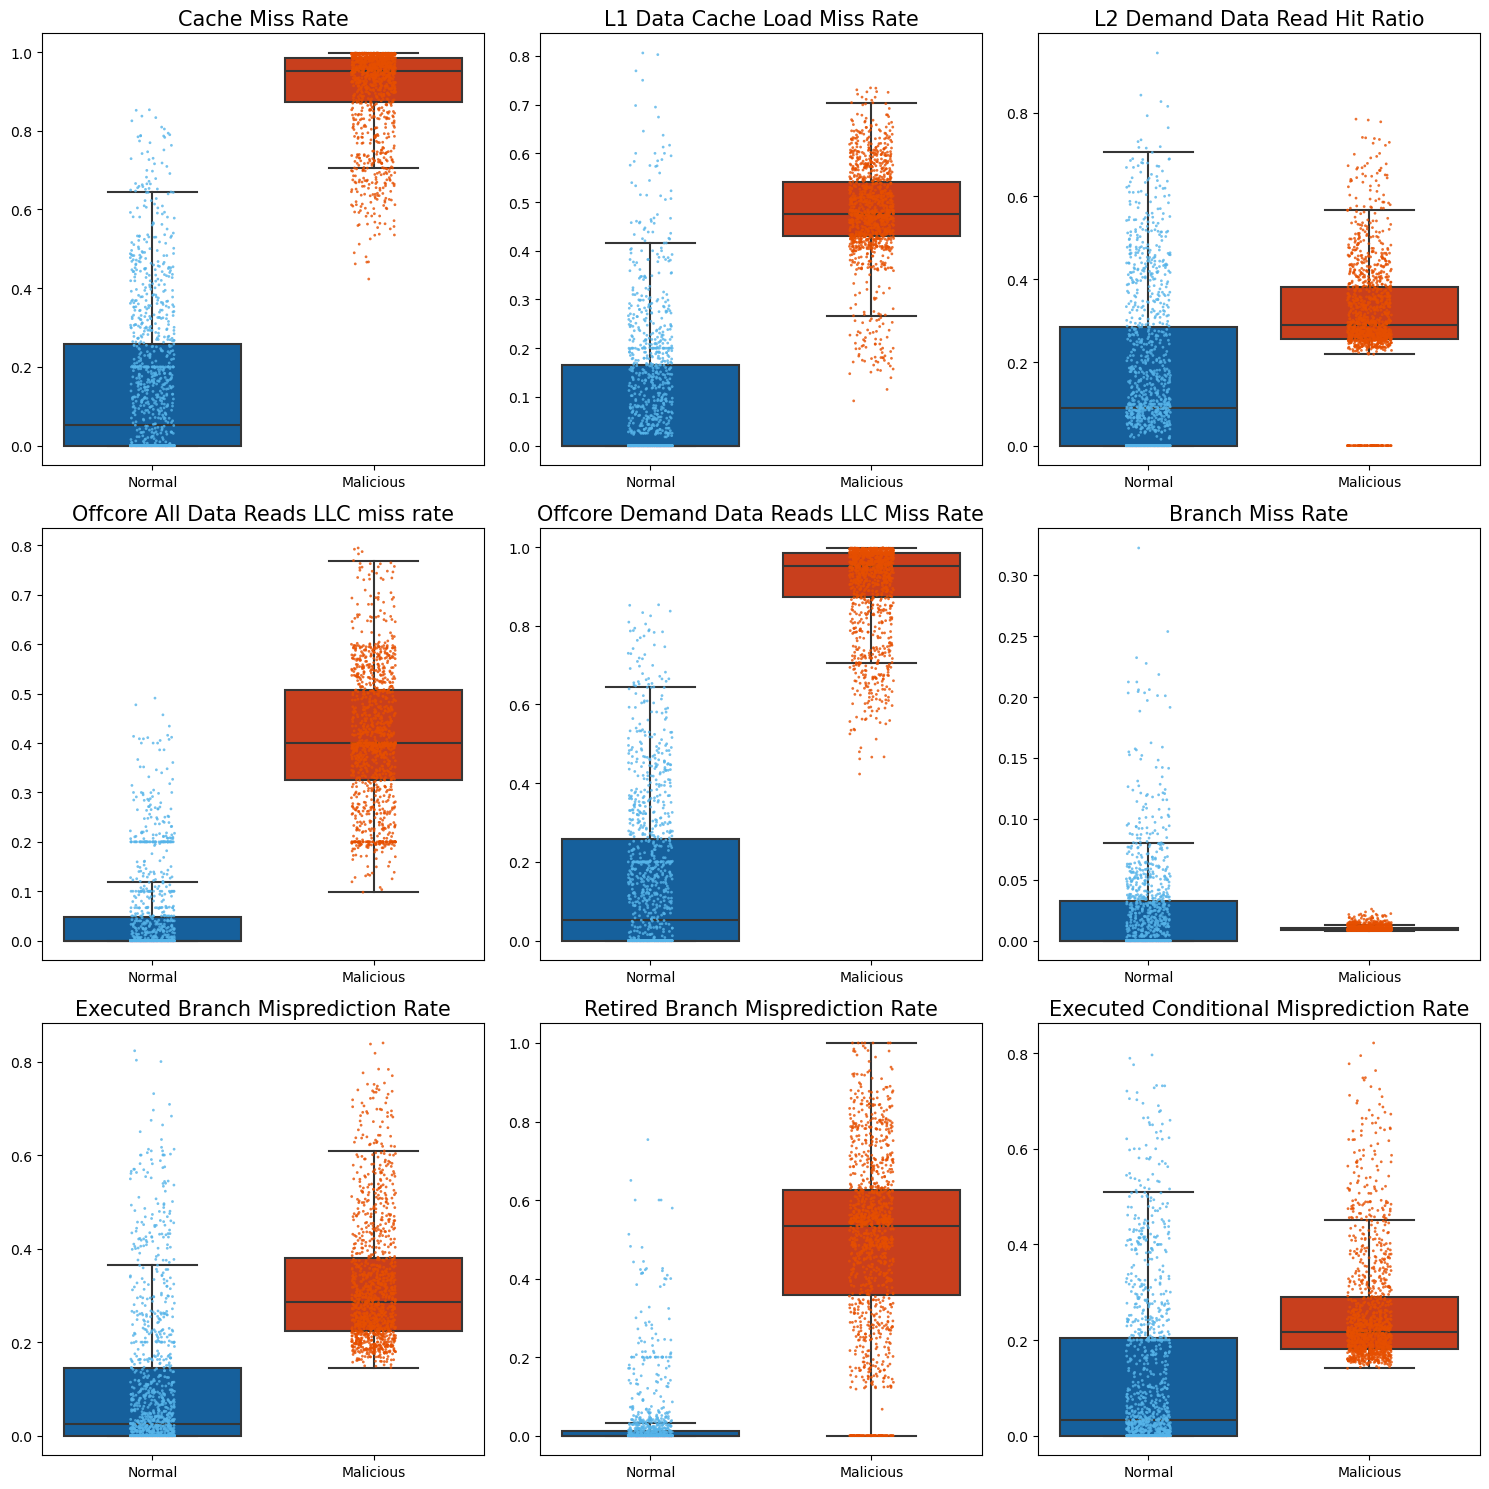

In [74]:
import random

# Randomly select 3 DataFrames from rate_idle_dataframes
random_idle_selection = random.sample(list(rate_idle_dataframes.items()), 2)
random_attack_selection = random.sample(list(rate_attack_dataframes.items()), 2)

# Assign independent variables for Idle DataFrames and print their names
idle_df_1, idle_df_2 = [df for _, df in random_idle_selection]
print("Selected Idle DataFrames:")
for i, (name, _) in enumerate(random_idle_selection, start=1):
    print(f"Idle DF {i}: {name}")

# Assign independent variables for Attack DataFrames and print their names
attack_df_1, attack_df_2 = [df for _, df in random_attack_selection]
print("\nSelected Attack DataFrames:")
for i, (name, _) in enumerate(random_attack_selection, start=1):
    print(f"Attack DF {i}: {name}")

# Example usage
print("\nShapes of Selected Idle DataFrames:")
print(f"Idle DF 1 Shape: {idle_df_1.shape}")

print("\nShapes of Selected Attack DataFrames:")
print(f"Attack DF 1 Shape: {attack_df_1.shape}")

# Call the function
plot_comparison(
    average_rows(idle_df_1),
    average_rows(attack_df_1),
    columns,
    file_name="rate_distribution_comparison_2.png"
)

In [75]:

# Assume rate_idle_dataframes is a dictionary and you have:
idle_list = list(rate_idle_dataframes.items())
attack_list = list(rate_attack_dataframes.items())
# Extract the DataFrames (second element of each tuple)
dfs_idle = [df for key, df in idle_list]
dfs_attack = [df for key, df in attack_list]
# Concatenate the DataFrames
idle_average = average_rows(pd.concat(dfs_idle, ignore_index=True))
attack_average = average_rows(pd.concat(dfs_attack, ignore_index=True))


# # Call the function
# plot_comparison(
#     idle_average,
#     attack_average,
#     columns,
#     file_name="rate_distribution_comparison_3.png"
# )